In [54]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import random

1
0.1
0.05
0.01


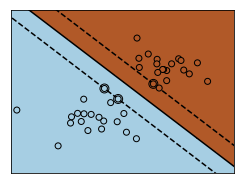

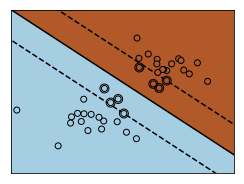

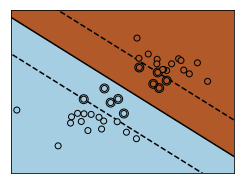

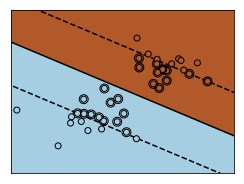

In [55]:
#from scikit learn example
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg1', 1), ('unreg', .1), ('reg', 0.05), ('reg2', 0.01)):
    print(str(penalty))
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [56]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

In [57]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [99]:
### Simple perceptron And with random data
### add in noise
def and_label_with_noise(df):
    rtn = []
    offset = 1
    for i in range(df.shape[0]):
        x = df['X'][i]
        y = df['Y'][i]
        if((x<offset and x>-offset) and (y<offset and y>-offset)):
            if(random.randint(0,10) <= 5):
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(-1)
                else:
                    rtn.append(1)
            else:
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(1)
                else:
                    rtn.append(-1)
                    
        else:
            if df['X'][i] >= df['Y'][i]:
                rtn.append(1)
            else:
                rtn.append(-1)
    return rtn

In [100]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [104]:
x_1 = uniform_data(50)
y_1 = uniform_data(50)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']


In [105]:
clf = []
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_1.fit(X.values, y.values)

clf_2 = svm.SVC(kernel='linear', C = 0.05)
clf_2.fit(X.values, y.values)

clf_3 = svm.SVC(kernel='linear', C = 0.01)
clf_3.fit(X.values, y.values)

clf_4 = svm.SVC(kernel='linear', C = 0.005)
clf_4.fit(X.values, y.values)


SVC(C=0.005, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

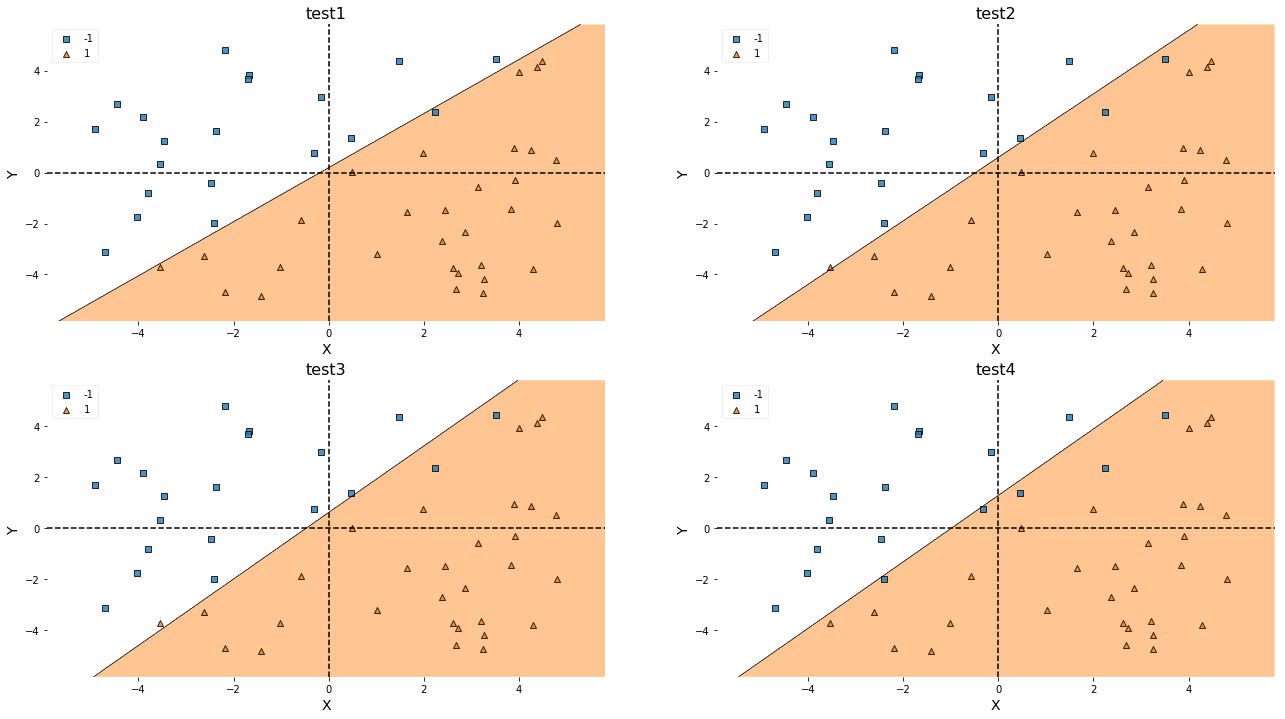

test1 accuracy: 0.98
test2 accuracy: 0.94
test3 accuracy: 0.94
test4 accuracy: 0.9


In [106]:
plt.figure(figsize=(22,12))
dims = [2,2]
define_plot(clf_1, X, y, "test1", 1, dims)
define_plot(clf_2, X, y, "test2", 2, dims)
define_plot(clf_3, X, y, "test3", 3, dims)
define_plot(clf_4, X, y, "test4", 4, dims)
plt.show()

print("test1 accuracy: " + str(clf_1.score(X_test.values, y_test.values)))
print("test2 accuracy: " + str(clf_2.score(X_test.values, y_test.values)))
print("test3 accuracy: " + str(clf_3.score(X_test.values, y_test.values)))
print("test4 accuracy: " + str(clf_4.score(X_test.values, y_test.values)))